<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Lab%203/Lab_3-stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Stock performance trends in 2023

We decided to leverage clustering to determine what kind of insights could be gained on shifts for shifts in stock prices in 2023. Specifically, we created clustering based on YTD performance, and grouped overall trends. 

Then we compared those overall trends vs. the top 50 stocks in the US, to see what kind of insights could be garnered. 

When we compare overall trends vs. top trading companies, are there any standouts, which can provide information on the shifts in the economy in 2023.

In [ ]:
pip install y_fin

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 25.3 MB/s eta 0:00:00


In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [46]:

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52112400,AMAZON
2023-03-07,94.059998,95.089996,92.779999,93.550003,93.550003,49100700,AMAZON
2023-03-08,93.599998,94.169998,92.180000,93.919998,93.919998,44899100,AMAZON
2023-03-09,93.680000,96.209999,92.180000,92.250000,92.250000,56218700,AMAZON
2023-03-10,92.669998,93.570000,90.250000,90.730003,90.730003,69747500,AMAZON
2023-03-13,89.970001,94.019997,88.120003,92.430000,92.430000,72397100,AMAZON
2023-03-14,93.830002,95.070000,92.709999,94.879997,94.879997,60912700,AMAZON
2023-03-15,93.220001,96.669998,93.070000,96.199997,96.199997,70731800,AMAZON
2023-03-16,95.750000,100.989998,95.610001,100.040001,100.040001,84446900,AMAZON


In [132]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe using pandas_datareader
data = pdr.get_data_yahoo("SPY", start="2023-01-01", end="2023-03-19")

[*********************100%***********************]  1 of 1 completed


In [133]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,379.372131,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,382.300964,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,377.937592,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,386.604492,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,386.385345,73978100
2023-01-10,387.250000,390.649994,386.269989,390.579987,389.095001,65358100
2023-01-11,392.230011,395.600006,391.380005,395.519989,394.016235,68881100
2023-01-12,396.670013,398.489990,392.420013,396.959991,395.450745,90157700
2023-01-13,393.619995,399.100006,393.339996,398.500000,396.984894,63903900


In [ ]:
data

AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2017-01-03  28.950001  29.082500  28.690001  29.037500  27.133329  115127600   
2017-01-04  28.962500  29.127501  28.937500  29.004999  27.102959   84472400   
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.240784   88774400   
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.544476  127007600   
2017-01-09  29.487499  29.857500  29.485001  29.747499  27.796768  134247600   
...               ...        ...        ...        ...        ...        ...   
2017-04-24  35.875000  35.987499  35.794998  35.910000  33.700638   68537200   
2017-04-25  35.977501  36.224998  35.967499  36.132500  33.909443   75486000   
2017-04-26  36.117500  36.150002  35.845001  35.919998  33.710022   80164800   
2017-04-27  35.980000  36.040001  35.827499  35.947498  33.735825   56985200   
2017-04-28  36.022499  36.075001  35.817501  35.912498  33.702972   83441600   

                   SPY                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2017-01-03  225.039993  225.830002  223.880005  225.240005  202.856583   
2017-01-04  225.619995  226.750000  225.610001  226.580002  204.063354   
2017-01-05  226.270004  226.580002  225.479996  226.399994  203.901276   
2017-01-06  226.529999  227.750000  225.899994  227.210007  204.630768   
2017-01-09  226.910004  227.070007  226.419998  226.460007  203.955292   
...                ...         ...         ...         ...         ...   
2017-04-24  237.179993  237.410004  234.559998  237.169998  214.530228   
2017-04-25  237.910004  238.949997  237.809998  238.550003  215.778488   
2017-04-26  238.509995  239.529999  238.350006  238.399994  215.642792   
2017-04-27  238.770004  238.949997  237.979996  238.600006  215.823700   
2017-04-28  238.899994  238.929993  237.929993  238.080002  215.353378   

                       
               Volume  
Date                   
2017-01-03   91366500  
2017-01-04   78744400  
2017-01-05   78379000  
2017-01-06   71559900  
2017-01-09   46939700  
...               ...  
2017-04-24  119209900  
2017-04-25   76698300  
2017-04-26   84702500  
2017-04-27   57410300  
2017-04-28   63532800  

[81 rows x 12 columns]

In [50]:
import yfinance as yf
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30",
                   group_by="ticker")

[*********************100%***********************]  2 of 2 completed


## Data Meaning

#### S&P 500
The Standard and Poor's 500, or simply the S&P 500,[5] is a stock market index tracking the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of the index.[2]

- Stock Splits: A stock split happens when a company increases the number of its shares to boost the stock's liquidity. Although the number of shares outstanding increases by a specific multiple, the total dollar value of all shares outstanding remains the same because a split does not fundamentally change the company's value.(https://www.investopedia.com/terms/s/stocksplit.asp)

- Dividends: A dividend is the distribution of a company's earnings to its shareholders and is determined by the company's board of directors. Dividends are often distributed quarterly and may be paid out as cash or in the form of reinvestment in additional stock.(https://www.investopedia.com/terms/d/dividend.asp)
- Open
- High 
- Low 
- Close
- Volume
- Adj Close
- Ticker 
- Company Name
- Industry
- Date

Other potential columns:
- Market Cap
- Enterprise Value
- Trailing P/E
- Forward P/E
- PEG Ratio (5 yr expected)
- Price/Sales (ttm)
- Price/Book (mrq)
- Enterprise Value/Revenue
- Enterprise Value/EBITDA 

In [136]:
import yahoo_fin.stock_info as si
sp_500 = si.tickers_sp500()

In [137]:

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = sp_500


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
dow_stats = {}
for ticker in sp_500:
    temp = si.get_stats_valuation(ticker)
    temp = temp.iloc[:,:2]
    temp.columns = ["Attribute", "Recent"]
    dow_stats[ticker] = temp
dow_stats


In [ ]:
combined_stats = pd.concat(dow_stats)
combined_stats = combined_stats.reset_index()
combined_stats

del combined_stats["level_1"]
# update column names
combined_stats.columns = ["Ticker", "Attribute", "Recent"]
combined_stats

combined_stats=combined_stats.pivot(index='Ticker', columns='Attribute', values='Recent')
combined_stats


In [107]:
import yfinance as yf

tickers = yf.Tickers('msft aapl goog')



In [110]:
tickers.tickers['AAPL'].history(period="1mo")


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-21 00:00:00-05:00,150.199997,151.300003,148.410004,148.479996,58867200,0.0,0.0
2023-02-22 00:00:00-05:00,148.869995,149.949997,147.160004,148.910004,51011300,0.0,0.0
2023-02-23 00:00:00-05:00,150.089996,150.339996,147.240005,149.399994,48394200,0.0,0.0
2023-02-24 00:00:00-05:00,147.110001,147.190002,145.720001,146.710007,55469600,0.0,0.0
2023-02-27 00:00:00-05:00,147.710007,149.169998,147.449997,147.919998,44998500,0.0,0.0
2023-02-28 00:00:00-05:00,147.050003,149.080002,146.830002,147.410004,50547000,0.0,0.0
2023-03-01 00:00:00-05:00,146.830002,147.229996,145.009995,145.309998,55479000,0.0,0.0
2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,0.0,0.0


In [111]:
tickers.tickers['AAPL'].actions

,Dividends,Stock Splits
Date,,


In [83]:
msft = yf.Ticker("MSFT")
msft.fast_info.items


<bound method FastInfo.items of lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']>

In [112]:
msft.fast_info.year_change

-0.06595136630835342

In [113]:
msft.fast_info.year_high

315.95001220703125

In [114]:
msft.major_holders

,0,1
0,0.06%,% of Shares Held by All Insider
1,73.70%,% of Shares Held by Institutions
2,73.74%,% of Float Held by Institutions
3,6156,Number of Institutions Holding Shares


[*********************100%***********************]  1 of 1 completed


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_base_url',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fix_unit_mixups',
 '_fix_zeroes',
 '_fundamentals',
 '_get_ticker_tz',
 '_history',
 '_history_metadata',
 '_holders',
 '_isin',
 '_news',
 '_options2df',
 '_quote',
 '_reconstruct_intervals_batch',
 '_scrape_url',
 '_shares',
 '_tz',
 'actions',
 'analyst_price_target',
 'balance_sheet',
 'balancesheet',
 'basic_info',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_forecasts',
 'earnings_tren

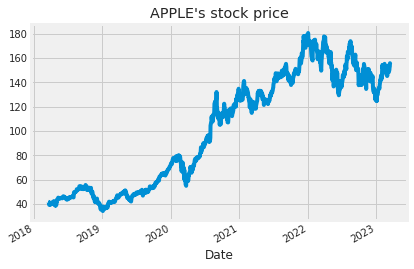

In [28]:
aapl_df = yf.download('AAPL')
aapl_df = ticker.history(period="5y")
aapl_df['Close'].plot(title="APPLE's stock price")


In [22]:
yf.download(tickers = "SPY AAPL",  # list of tickers
            period = "1y",         # time period
            interval = "1d",       # trading interval
            ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
            prepost = False)       # download pre/post market hours data?

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2022-03-18  162.992630  437.114197  163.979996  444.519989  164.479996   
2022-03-21  164.384216  436.986359  165.380005  444.390015  166.350006   
2022-03-22  167.803497  442.099731  168.820007  449.589996  169.419998   
2022-03-23  169.185150  436.406158  170.210007  443.799988  172.639999   
2022-03-24  173.021881  442.984711  174.070007  450.489990  174.139999   
...                ...         ...         ...         ...         ...   
2023-03-13  150.470001  383.894836  150.470001  385.359985  153.139999   
2023-03-14  152.589996  390.240662  152.589996  391.730011  153.399994   
2023-03-15  152.990005  387.799957  152.990005  389.279999  153.250000   
2023-03-16  155.850006  394.603973  155.850006  396.109985  156.460007   
2023-03-17  155.000000  389.989990  155.000000  389.989990  156.740005   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2022-03-18  444.859985  159.759995  437.220001  160.509995  438.000000   
2022-03-21  446.459991  163.009995  440.679993  163.509995  444.339996   
2022-03-22  450.579987  164.910004  445.859985  165.509995  445.859985   
2022-03-23  448.489990  167.649994  443.709991  167.990005  446.910004   
2022-03-24  450.500000  170.210007  444.760010  171.059998  445.940002   
...                ...         ...         ...         ...         ...   
2023-03-13  390.390015  147.699997  380.649994  147.809998  381.809998   
2023-03-14  393.450012  150.100006  387.049988  151.279999  390.500000   
2023-03-15  389.489990  149.919998  383.709991  151.190002  385.890015   
2023-03-16  396.470001  151.639999  386.290009  152.160004  386.820007   
2023-03-17  394.399994  154.279999  388.549988  156.080002  393.220001   

               Volume             
                 AAPL        SPY  
Date                              
2022-03-18  123511700  106345500  
2022-03-21   95811400   88349800  
2022-03-22   81532000   74650400  
2022-03-23   98062700   79426100  
2022-03-24   90131400   64736900  
...               ...        ...  
2023-03-13   84457100  157790000  
2023-03-14   73695900  149752400  
2023-03-15   77167900  172996900  
2023-03-16   76161100  143254200  
2023-03-17   98862500  140047400  

[251 rows x 12 columns]

In [ ]:

# get historical market data
hist = msft.history(period="1mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-13 00:00:00-05:00,266.971322,273.913924,266.482526,270.642120,44630900,0.00,0.0
2023-02-14 00:00:00-05:00,271.988772,274.283013,268.607227,271.490021,37047900,0.00,0.0
2023-02-15 00:00:00-05:00,268.320007,270.730011,266.179993,269.320007,28922400,0.68,0.0
2023-02-16 00:00:00-05:00,264.019989,266.739990,261.899994,262.149994,29603600,0.00,0.0
2023-02-17 00:00:00-05:00,259.390015,260.089996,256.000000,258.059998,30000100,0.00,0.0
2023-02-21 00:00:00-05:00,254.479996,255.490005,251.589996,252.669998,28397400,0.00,0.0
2023-02-22 00:00:00-05:00,254.089996,254.339996,250.339996,251.509995,22491100,0.00,0.0
2023-02-23 00:00:00-05:00,255.559998,256.839996,250.479996,254.770004,29219100,0.00,0.0
2023-02-24 00:00:00-05:00,249.960007,251.000000,248.100006,249.220001,24990900,0.00,0.0


In [ ]:
msft.history_metadata


{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': Timestamp('1986-03-13 09:30:00-0500', tz='America/New_York'),
 'regularMarketTime': Timestamp('2023-03-10 16:00:05-0500', tz='America/New_York'),
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 248.59,
 'chartPreviousClose': 263.1,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'start': Timestamp('2023-03-10 04:00:00-0500', tz='America/New_York'),
   'end': Timestamp('2023-03-10 09:30:00-0500', tz='America/New_York')},
  'regular': {'start': Timestamp('2023-03-10 09:30:00-0500', tz='America/New_York'),
   'end': Timestamp('2023-03-10 16:00:00-0500', tz='America/New_York')},
  'post': {'start': Timestamp('2023-03-10 16:00:00-0500', tz='America/New_York'),
   'end': Timestamp('2023-03-10 20:00:00-0500', tz='America/New_York')}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '

In [ ]:
msft.major_holders

,0,1
0,0.06%,% of Shares Held by All Insider
1,73.70%,% of Shares Held by Institutions
2,73.75%,% of Float Held by Institutions
3,6152,Number of Institutions Holding Shares


In [ ]:
msft.get_shares_full(start="2022-01-01", end=None)
aapl_df['Close'].plot(title="APPLE's stock price")

2022-01-27 00:00:00-05:00    7496869888
2022-02-04 00:00:00-05:00    7800719872
2022-02-05 00:00:00-05:00    7496869888
2022-02-11 00:00:00-05:00    7496869888
2022-03-04 00:00:00-05:00    7605040128
2022-03-05 00:00:00-05:00    7496869888
2022-03-16 00:00:00-04:00    7595310080
2022-03-17 00:00:00-04:00    7496869888
2022-03-28 00:00:00-04:00    7507230208
2022-03-31 00:00:00-04:00    7496869888
2022-04-01 00:00:00-04:00    7631819776
2022-04-02 00:00:00-04:00    7496869888
2022-04-04 00:00:00-04:00    7496869888
2022-04-29 00:00:00-04:00    7479029760
2022-06-09 00:00:00-04:00    7536840192
2022-06-13 00:00:00-04:00    7479029760
2022-07-28 00:00:00-04:00    7464000000
2022-08-01 00:00:00-04:00    7457889792
2022-08-25 00:00:00-04:00    7475469824
2022-08-26 00:00:00-04:00    7457889792
2022-09-01 00:00:00-04:00    7457889792
2022-09-02 00:00:00-04:00    7488540160
2022-09-02 00:00:00-04:00    7457889792
2022-09-10 00:00:00-04:00    7290379776
2022-09-12 00:00:00-04:00    7457889792


In [ ]:
msft.earnings_dates


,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-01-22 16:00:00-05:00,NaN,NaN,NaN
2024-01-22 05:00:00-05:00,NaN,NaN,NaN
2023-10-23 06:00:00-04:00,NaN,NaN,NaN
2023-07-24 06:00:00-04:00,NaN,NaN,NaN
2023-04-24 06:00:00-04:00,2.23,NaN,NaN
2023-01-24 11:00:00-05:00,2.30,2.32,0.0109
2022-10-25 12:00:00-04:00,2.30,2.35,0.0204
2022-07-26 12:00:00-04:00,2.29,2.23,-0.0275
2022-04-26 12:00:00-04:00,2.19,2.22,0.0160


In [135]:
si.tickers_sp500()

['A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF-B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLK',
 'BMY',
 'BR',
 'BRK-B',
 'BRO',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDAY',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTLT',
 'CTR

In [115]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np

n_clusters = 2
model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=1).fit(data)
# model = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters).fit(data)
model = DBSCAN(eps=0.15, min_samples=10).fit(data)

labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels, average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

silhouette_per_sample = metrics.silhouette_samples(data,labels)

# get the middle of each cluster
centroids = []
for lab in range(0,n_clusters_):
    centroids.append( [np.mean(data[np.where(labels==lab),0]), np.mean(data[np.where(labels==lab),1])] )
centroids = np.array(centroids)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels,
                    cmap=plt.cm.Spectral, s=5, linewidths=0)

if len(centroids)>0:
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='+', s=200, linewidths=3, color='k', zorder=10)  # plot the centroids
plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=silhouette_per_sample,
                cmap=plt.cm.gray, s=5, linewidths=0)
plt.title('Clusters with silhouette coefficient coloring')
plt.show()

Estimated number of clusters: 0


NameError: ignored

In [ ]:
msft.options

('2023-03-17',
 '2023-03-24',
 '2023-03-31',
 '2023-04-06',
 '2023-04-14',
 '2023-04-21',
 '2023-05-19',
 '2023-06-16',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-10-20',
 '2024-01-19',
 '2024-06-21',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

In [5]:
import yfinance as yf

msft = yf.Ticker("MSFT")


In [12]:
msftNnews = msft.news

In [16]:
msftNnews[0]

{'uuid': '6bc3a2fa-0782-35ea-b141-8adc1784308a',
 'title': '15 Best Augmented Reality Stocks to Buy Now',
 'publisher': 'Insider Monkey',
 'link': 'https://finance.yahoo.com/news/15-best-augmented-reality-stocks-181314519.html',
 'providerPublishTime': 1679249594,
 'type': 'STORY',
 'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/Fqzwkynfk3ZYmsTmN0FlCg--~B/aD0yNjYzO3c9MTkyMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/insidermonkey.com/bae55fa1a3aec33b7b384a08e18aef60',
    'width': 1920,
    'height': 2663,
    'tag': 'original'},
   {'url': 'https://s.yimg.com/uu/api/res/1.2/XgsKLxEAP.4p55V8pNpqng--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/bae55fa1a3aec33b7b384a08e18aef60',
    'width': 140,
    'height': 140,
    'tag': '140x140'}]},
 'relatedTickers': ['GOOGL',
  'GE',
  'MSFT',
  'AMD',
  'SNAP',
  'ANSS',
  'BIDU',
  'PTC',
  'QCOM',
  'HPE',
  'VUZI',
  'SPLK']}

In [15]:
msftNnews_data = msftNnews.DataReader()

AttributeError: ignored

In [13]:
msftNnews

[{'uuid': '6bc3a2fa-0782-35ea-b141-8adc1784308a',
  'title': '15 Best Augmented Reality Stocks to Buy Now',
  'publisher': 'Insider Monkey',
  'link': 'https://finance.yahoo.com/news/15-best-augmented-reality-stocks-181314519.html',
  'providerPublishTime': 1679249594,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/Fqzwkynfk3ZYmsTmN0FlCg--~B/aD0yNjYzO3c9MTkyMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/insidermonkey.com/bae55fa1a3aec33b7b384a08e18aef60',
     'width': 1920,
     'height': 2663,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/XgsKLxEAP.4p55V8pNpqng--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/bae55fa1a3aec33b7b384a08e18aef60',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['GOOGL',
   'GE',
   'MSFT',
   'AMD',
   'SNAP',
   'ANSS',
   'BIDU',
   'PTC',
   'QCOM',
   'HPE',
   'VUZI',
   'SPLK']}

In [11]:
msftNnews = msft.news.to_frame()
msftNnews

AttributeError: ignored

In [8]:
msft.options

('2023-03-24',
 '2023-03-31',
 '2023-04-06',
 '2023-04-14',
 '2023-04-21',
 '2023-04-28',
 '2023-05-19',
 '2023-06-16',
 '2023-07-21',
 '2023-08-18',
 '2023-09-15',
 '2023-10-20',
 '2023-11-17',
 '2024-01-19',
 '2024-06-21',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

In [ ]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info (slow)
#msft.info
# fast access to subset of stock info (opportunistic)
msft.fast_info

# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
#msft.shares
# - accurate time-series count:
msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
#msft.income_stmt
#msft.quarterly_income_stmt
# - balance sheet
#msft.balance_sheet
#msft.quarterly_balance_sheet
# - cash flow statement
#msft.cashflow
#msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders

# show earnings
#msft.earnings
#msft.quarterly_earnings

# show sustainability
#msft.sustainability

# show analysts recommendations
#msft.recommendations
#msft.recommendations_summary


# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates


# show options expirations
msft.options

# show news
msft.news


# data available via: opt.calls, opt.puts

[{'uuid': '60d8877f-622c-3280-8919-c66a852f69fc',
  'title': '3 Top Tech Stocks to Buy During a Recession',
  'publisher': 'Motley Fool',
  'link': 'https://finance.yahoo.com/m/60d8877f-622c-3280-8919-c66a852f69fc/3-top-tech-stocks-to-buy.html',
  'providerPublishTime': 1678627380,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/tSRQ6MNUFJKI1b80JxiTrg--~B/aD0yODgwO3c9NTEyMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/motleyfool.com/1fa8ecafc28868507ab92a9ffad73c52',
     'width': 5120,
     'height': 2880,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/8L3VOHLf.j9GRhSr4MEFNw--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/motleyfool.com/1fa8ecafc28868507ab92a9ffad73c52',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['MSFT', 'T-PC', 'CRWD', 'AAPL']},
 {'uuid': 'a0aa174a-d5e0-388f-812a-89e5890dcbd5',
  'title': 'Better AI Stock: Amazo

In [4]:
obj = yf.Ticker(‘goog’)

SyntaxError: ignored